# Instalar os programas e montar o google Drive

In [ ]:
!pip install pyabf
!pip install efel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.6/644.6 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 18.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


INFORMAR O CAMINHO PARA A PASTA ONDE ESTAO OS ARQUIVOS A SEREM ANALISADOS:


 OBS.: recomendo deixar este arquivo_de_codigo no msm local da pasta dos arquivos

In [ ]:
cd '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/'

/content/drive/.shortcut-targets-by-id/1lMJs6OOxMh_gEFC-2der6SB0a4NRFsG3/Laboratorio Neurofisiologia/Projeto Anoxia


In [ ]:
ls -li 'P14-P17'

total 262
607 -rw------- 1 root root 87602 Sep  4 01:23  4-pulses_P15_CT_HPC.xlsx
599 drwx------ 2 root root  4096 Apr 29 11:06 'CPT-8 100 nM'/
604 drwx------ 2 root root  4096 Aug 30 18:31 'CSG_A2AR_agonist '/
600 drwx------ 2 root root  4096 Aug 14 18:13 'EPSCs espontâneos'/
601 drwx------ 2 root root  4096 Aug 18 01:33  HFS/
609 -rw------- 1 root root 46464 Sep  7 20:29  Input-Output_HPC_P15_ANOXIA.xlsx
608 -rw------- 1 root root 34726 Sep  4 04:23  Input-Output_HPC_P15_CONTROLE.xlsx
605 drwx------ 2 root root  4096 Sep  3 00:17 'IPSCs - CsCl'/
603 drwx------ 2 root root  4096 Aug 22 11:43  miniEPSCs/
606 -rw------- 1 root root 65813 Sep  3 17:42  Pairerd-Pulse_Paired-Pulse_P15_CONTROLE.xlsx
598 drwx------ 2 root root  4096 Apr 29 10:55 'PA- RAMP- PPS - GF'/
602 drwx------ 2 root root  4096 Aug 19 16:23 'Theta Burst Stimulation'/


In [ ]:
import os
import efel
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from scipy.signal import find_peaks
import seaborn as sns
import scipy.stats as stats


In [ ]:
rootFolder = '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/'

In [ ]:
rootFolder_controle_CPF = '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Serotonina 2/'

In [ ]:
# Definir nome do protocolo de interesse
protocolo = "Long"

times = []
voltages = []
I = []
cellnames = []
groupnames = []
groupnames2 = []
outliers = ['24722000.abf']

for idade in ['P14-P17']: # ,

  g1 = rootFolder + idade + '/PA- RAMP- PPS - GF'
  if '.' not in g1:
    print(idade)

    for g2 in os.listdir(g1):
      if '.' not in g2:
        print('\t',g2)

        for g3 in os.listdir(g1+'/'+g2):
          if '.' not in g3:
            print('\t\t',g3)


            # -------------------------------------------------------------------------------------------------------------------------- #

            cellnumber = 0
            if 'Cell 01' in os.listdir(g1+'/'+g2+'/'+g3):

              for g4 in os.listdir(g1+'/'+g2+'/'+g3):
                if 'ell' in g4 and '.' not in g4:

                  if 'ANOXIA' in g2 + g3 or 'anoxia' in g2 + g3:
                    if 'CPF' in g2 + g3:
                      grupo = 'CPF_ANOXIA'
                    else:
                      grupo = 'HPC_ANOXIA'

                  elif 'CONTROLE' in g2 + g3 or 'Controle' in g2 + g3:
                    if 'CPF' in g2 + g3:
                      grupo = 'CPF_CONTROLE'
                    else:
                      grupo = 'HPC_CONTROLE'

                  print('\t\t\t',g4, grupo)

                  # -------------------------------------------------------------------------------------------------------------------------- #

                  for g5 in os.listdir(g1+'/'+g2+'/'+g3+'/'+g4):
                    if '.abf' in g5 and g5 not in outliers:

                      firstREO = 0

                      cell = g4

                      filename = g5

                      abf = pyabf.ABF(g1+'/'+g2+'/'+g3+'/'+cell+'/'+filename)

                      fs = abf.dataRate

                      if protocolo in abf.protocol and 'HPC' in grupo and idade+'_'+grupo+'_'+cell not in groupnames2:

                          ############################################
                          # Save Data and plot
                          ############################################

                          print(abf.protocol)
                          print(abf.sweepList)

                          print(grupo+'/'+cell+'/'+filename, abf.protocol, abf.sweepList)
                          # print(abf)

                          plt.figure(figsize=(15, 4))

                          cellnumber = cellnumber + 1
                          celname = 'Cell ' + str(cellnumber)

                          IpA = -130
                          for i in abf.sweepList: # GUI>> modf p dados do gui (muitos steps)

                              abf.setSweep(i, channel=0)
                              IpA = IpA + 20.0

                              peaks, peaksV = find_peaks(abf.sweepY, height=0, distance=40) # V > 0 mV and ISI > 2 ms (at 20kHz)
                              peak_count = len(peaks)

                              if peak_count >= 3 and firstREO == 0:

                                I.append((-110+20*i + abf.sweepC))
                                times.append(abf.sweepX)
                                voltages.append(abf.sweepY)
                                cellnames.append(celname)
                                groupnames.append(idade+'_'+grupo+'_'+cell+'_'+filename)
                                groupnames2.append(idade+'_'+grupo+'_'+cell)

                                firstREO = firstREO + 1

                                plt.plot(abf.sweepX, abf.sweepY, alpha=.95, color = 'blue', linewidth=1.5,
                                          label="I=  %.0f pA" % (IpA))
                                plt.plot(abf.sweepX[peaks], abf.sweepY[peaks], 'o')
                                # b, a = signal.butter(4, 0.05, "low")
                                # current_filtered = signal.filtfilt(b, a, abf.sweepY, padlen=150)
                                # plt.plot(abf.sweepX, current_filtered, alpha=.5, color='r', linewidth=2.5,
                                #           label="I=  %.0f pA" % (IpA))
                                plt.legend()
                                plt.xlim(0,1.100)
                                plt.xlabel('Time (s)')
                                plt.ylabel('Voltage (mV)')
                                # plt.ylim(min(abf.sweepY[5000:15000])-5.0,min(abf.sweepY[5000:15000])+50)
                                plt.title(celname + ": "+(filename))

                          plt.show()
                          plt.close()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
allcells, allcont = np.unique(cellnames,return_counts = True)

In [ ]:
allcells, allcont

(array(['Cell 1', 'Cell 10', 'Cell 11', ..., 'Cell 7', 'Cell 8', 'Cell 9'],
       dtype='<U7'),
 array([2, 2, 2, ..., 2, 2, 2]))

In [ ]:
allgroups, allcont = np.unique(groupnames,return_counts = True)

allgroups[0], allcont[0]/1, allgroups[53], allcont[1]/1

('P14-P17_HPC_ANOXIA_Cell 01_24426044.abf',
 1.0,
 'P14-P17_HPC_CONTROLE_Cell 01_24422081.abf',
 1.0)

In [ ]:
len(allgroups[0:53]), len(allgroups[53:])

(53, 48)

In [ ]:
############################################
# Analise eFEL (do Blue Brain Project)
############################################
traces = []

for ii in range(0, len(voltages)):  # MUDEI, era anf.sweepList
    trace = {'T': 1000.0*times[ii], 'V': voltages[ii],
            'I': I[ii],
            'stim_start': [17.2], 'stim_end': [1017.2]}
    traces.append(trace)

Lista_de_medidas = ['time_constant', 'voltage_base', 'steady_state_voltage_stimend', 'time_to_first_spike', 'Spikecount','mean_frequency', 'steady_state_voltage', 'minimum_voltage',
                                        'all_ISI_values', 'peak_time', 'peak_voltage', 'AP_amplitude', 'AP_duration', 'AP_begin_time', 'AP_begin_width', 'AP_duration_half_width',
                                        'min_AHP_values', 'AP_fall_time', 'AP_height', 'AP_rise_time', 'ADP_peak_amplitude', 'ADP_peak_values', 'AHP_depth', 'AHP_depth_abs',
                                        'AHP_depth_abs_slow', 'AHP_depth_from_peak', 'AHP_depth_slow', 'AHP_time_from_peak',
                                        'voltage_deflection', 'decay_time_constant_after_stim', 'ISI_CV', 'adaptation_index']

efel.set_setting("Threshold", 0.0)

feature_values = efel.get_feature_values(traces, Lista_de_medidas, raise_warnings=False);

In [ ]:
ii = 25
I[ii],times[ii],voltages[ii],cellnames[ii],groupnames[ii],groupnames2[ii], feature_values[ii]

(array([90., 90., 90., ..., 90., 90., 90.]),
 array([0.    , 0.0001, 0.0001, ..., 1.0998, 1.0999, 1.0999]),
 array([-61.615 , -61.7065, -61.676 , ..., -60.3333, -60.2722, -60.2722],
       dtype=float32),
 'Cell 26',
 'P14-P17_HPC_ANOXIA_Cell 26_24613088.abf',
 'P14-P17_HPC_ANOXIA_Cell 26',
 {'time_constant': None,
  'voltage_base': array([-61.1911]),
  'steady_state_voltage_stimend': array([-47.3482]),
  'time_to_first_spike': array([175.]),
  'Spikecount': array([4]),
  'mean_frequency': array([4.6131]),
  'steady_state_voltage': array([-55.5143]),
  'minimum_voltage': array([-61.3708]),
  'all_ISI_values': array([225.6, 247.3, 219.2]),
  'peak_time': array([192.2, 417.8, 665.1, 884.3]),
  'peak_voltage': array([56.427 , 53.5889, 53.9856, 53.8025]),
  'AP_amplitude': array([94.9707, 93.2922, 91.5833, 90.8508]),
  'AP_duration': array([2.4, 2.3, 2.6, 2.8]),
  'AP_begin_time': array([191.7, 417.3, 664.6, 883.7]),
  'AP_begin_width': array([2.9, 3.1, 2.9, 3.2]),
  'AP_duration_half_widt

In [ ]:
# Set the columns of the output table
table = pd.DataFrame(columns=['cell',
                              'current_pA',
                              'group'])

# Set the columns of the output table
table2 = pd.DataFrame(columns=['cell',
                              'current_pA',
                              'group'])

In [ ]:
group = [grp.split('_')[2] for grp in groupnames2]
idade = [grp.split('_')[0] for grp in groupnames2]
regiao = [grp.split('_')[1] for grp in groupnames2]

In [ ]:
medidas = ['peak_voltage', 'AP_amplitude', 'AP_duration', 'AP_begin_time', 'AP_begin_width', 'AP_duration_half_width',
                                            'min_AHP_values', 'AP_fall_time', 'AP_height', 'AP_rise_time', 'ADP_peak_amplitude', 'ADP_peak_values', 'AHP_depth', 'AHP_depth_abs',
                                            'AHP_depth_abs_slow', 'AHP_depth_from_peak', 'AHP_depth_slow', 'AHP_time_from_peak']
for ii in range(0, len(voltages)):
    length = len(table)

    table.loc[ii, 'cell'] = cellnames[ii]
    table.loc[ii, 'current_pA'] = I[ii][0]
    table.loc[ii, 'group'] =  group[ii]
    table.loc[ii, 'idade'] =  idade[ii]
    table.loc[ii, 'regiao'] =  regiao[ii]

    table2.loc[ii, 'cell'] = cellnames[ii]
    table2.loc[ii, 'current_pA'] = I[ii][0]
    table2.loc[ii, 'group'] =  group[ii]
    table2.loc[ii, 'idade'] =  idade[ii]
    table2.loc[ii, 'regiao'] =  regiao[ii]

    for medida in medidas:

      try:
        table.loc[ii, medida] = feature_values[ii][medida][0:3].mean()
      except:
        print("ERROR")
      table2.loc[ii, medida] = feature_values[ii][medida][0]


In [ ]:
table

,cell,current_pA,group,idade,regiao,peak_voltage,AP_amplitude,AP_duration,AP_begin_time,AP_begin_width,...,AP_height,AP_rise_time,ADP_peak_amplitude,ADP_peak_values,AHP_depth,AHP_depth_abs,AHP_depth_abs_slow,AHP_depth_from_peak,AHP_depth_slow,AHP_time_from_peak
0,Cell 1,30.0,ANOXIA,P14-P17,HPC,51.310221,95.377604,2.533333,318.166667,3.266667,...,51.310221,0.600000,0.437419,-41.046143,18.837823,-41.483561,-53.151449,92.793783,7.169935,2.666667
1,Cell 2,110.0,ANOXIA,P14-P17,HPC,33.253988,70.933024,1.700000,317.666667,1.333333,...,33.253988,0.500000,1.637777,-50.160726,8.917914,-51.798503,-53.731283,85.052490,6.985135,1.466667
2,Cell 3,10.0,ANOXIA,P14-P17,HPC,46.346029,85.530599,3.733333,301.200000,4.300000,...,46.346029,1.000000,0.620524,-36.265055,11.411879,-36.885579,-51.788330,83.231608,-3.490872,3.300000
3,Cell 4,90.0,ANOXIA,P14-P17,HPC,44.881185,90.047201,2.833333,309.366667,3.500000,...,44.881185,0.700000,1.363118,-41.259766,29.110379,-42.622884,-53.939819,87.504069,17.793443,2.800000
4,Cell 5,130.0,ANOXIA,P14-P17,HPC,51.432292,90.565999,2.733333,504.666667,3.600000,...,51.432292,0.600000,0.671387,-36.193848,34.557766,-36.865234,-50.659180,88.297526,20.763821,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Cell 44,170.0,CONTROLE,P14-P17,HPC,55.114746,99.273682,2.200000,301.433333,2.766667,...,55.114746,0.500000,0.834147,-40.415446,25.570340,-41.249593,-50.954183,96.364339,15.865750,2.266667
97,Cell 45,90.0,CONTROLE,P14-P17,HPC,56.477865,99.060059,2.433333,205.566667,3.133333,...,56.477865,0.533333,0.844320,-40.985107,20.065308,-41.829427,-49.692790,98.307292,12.201945,2.800000
98,Cell 46,110.0,CONTROLE,P14-P17,HPC,52.561442,92.936198,2.400000,618.566667,2.800000,...,52.561442,0.500000,0.478109,-36.448161,28.106689,-36.926270,-52.520752,89.487712,12.512207,2.300000
99,Cell 47,70.0,CONTROLE,P14-P17,HPC,50.821940,92.966715,2.500000,208.700000,3.133333,...,50.821940,0.600000,0.396729,-39.611816,22.884793,-40.008545,-49.367269,90.830485,13.526069,2.533333


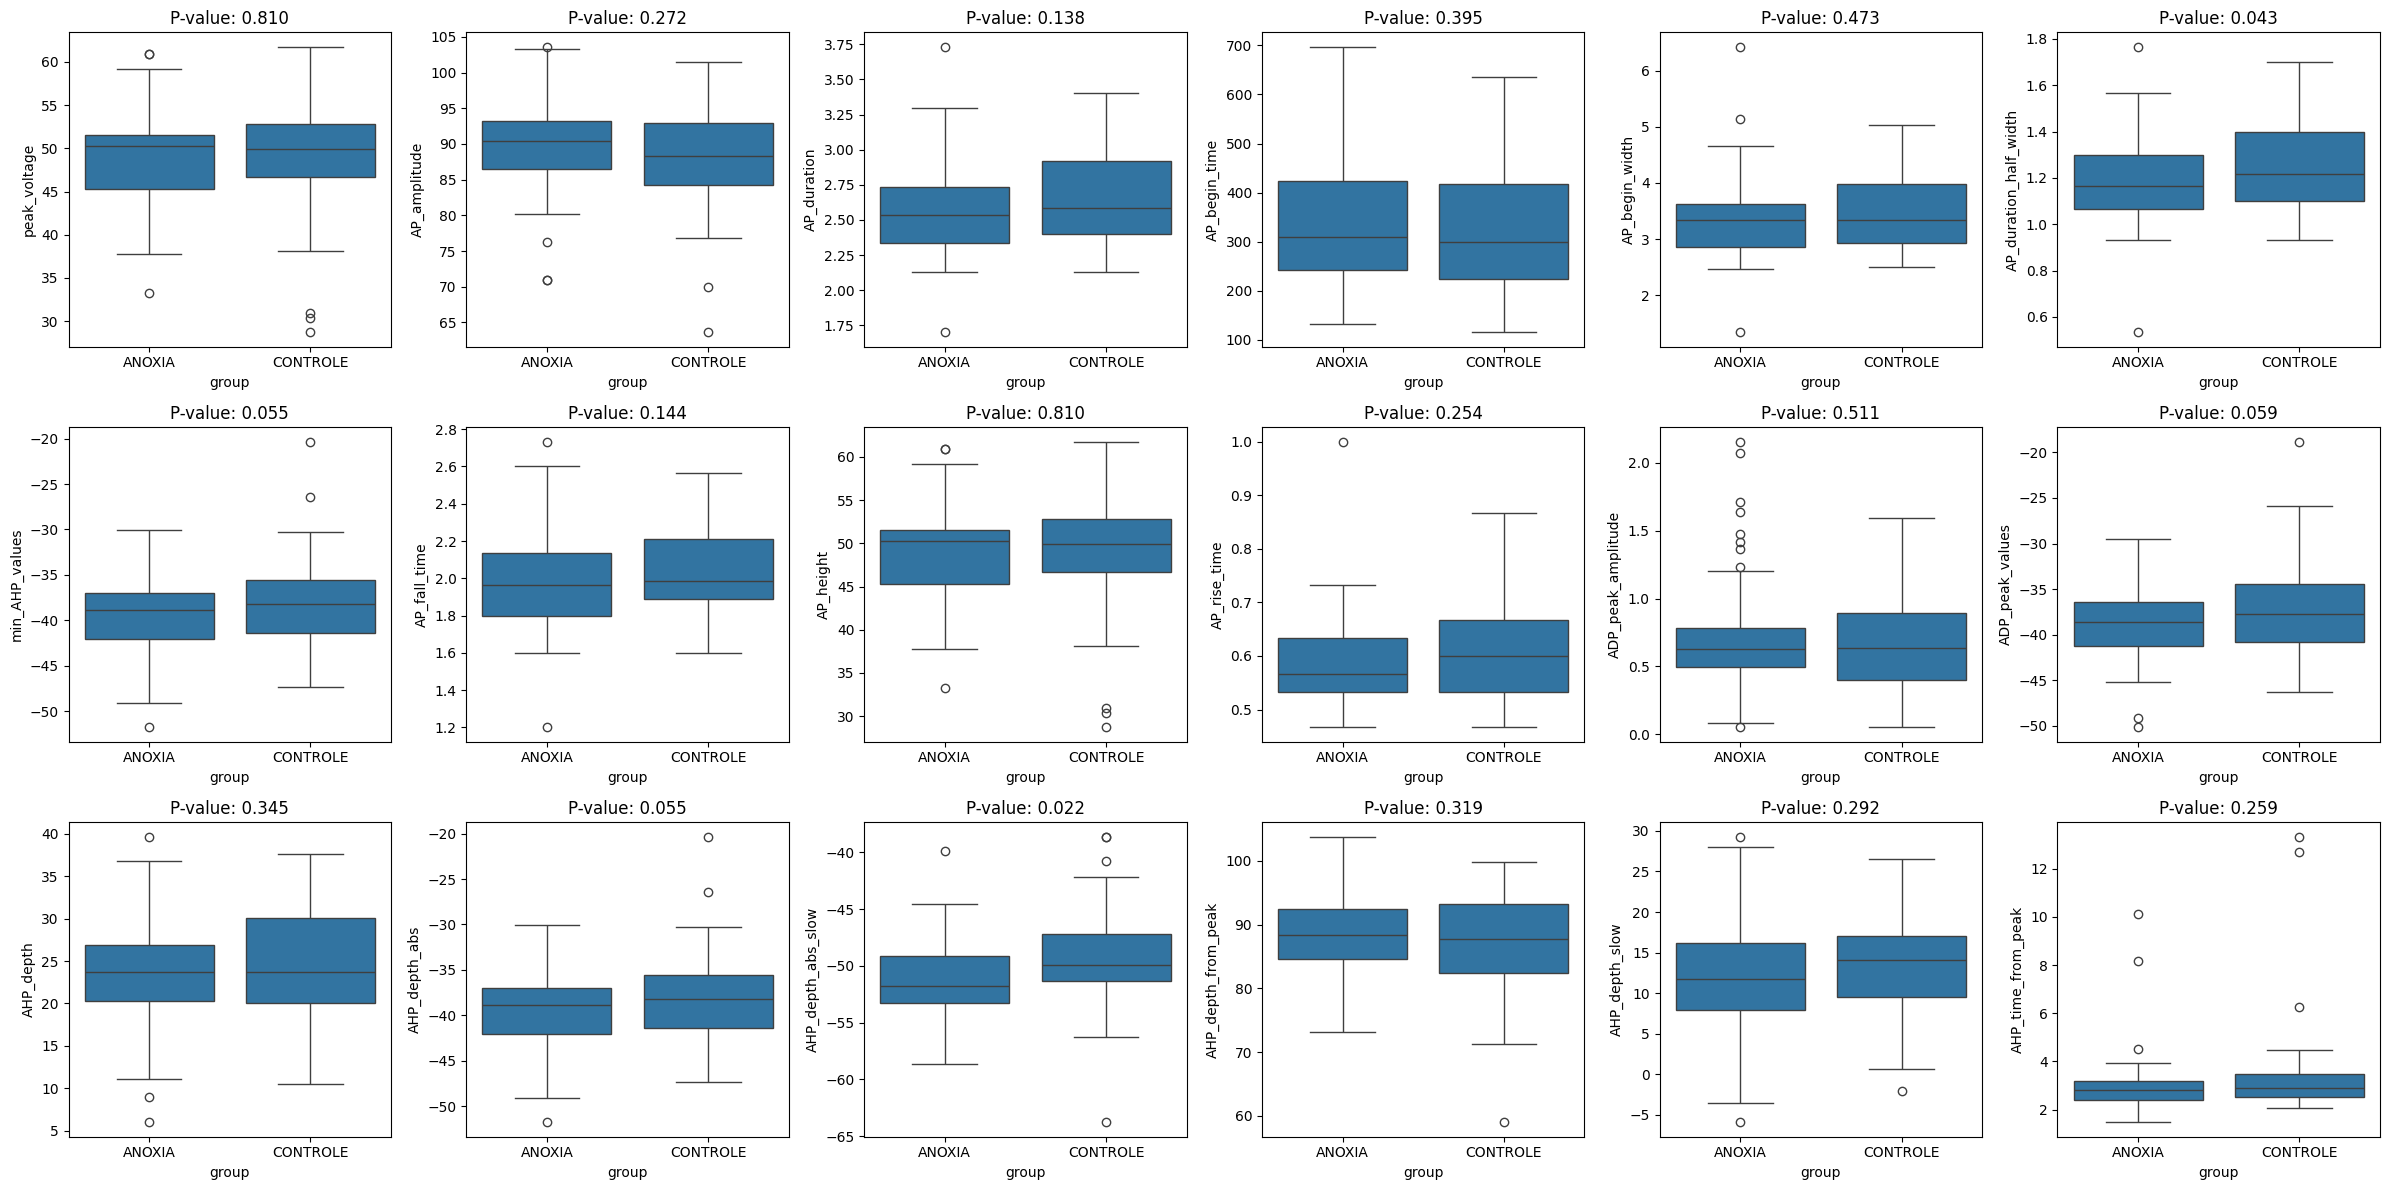

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))

data_filtered = table[table['group'].isin(['CONTROLE', 'ANOXIA'])]

for i, medida in enumerate(medidas):


    # Perform t-test
    control_data = data_filtered[data_filtered['group'] == 'CONTROLE'][medida].astype(float) # Convert to numeric type
    anoxia_data = data_filtered[data_filtered['group'] == 'ANOXIA'][medida].astype(float) # Convert to numeric type
    t_stat, p_value = stats.ttest_ind(control_data, anoxia_data)

    # print(f"T-statistic: {t_stat:.2f}")
    # print(f"P-value: {p_value:.3f}")

    # plt.title(f"Mean {medida}, P-value: {p_value:.3f}")
    # Create boxplot
    row = i // 6  # Calculate the row index
    col = i % 6   # Calculate the column index
    ax = axes[row, col]  # Access the correct Axes object using row and column indices
    ax.set_title(f"P-value: {p_value:.3f}")
    sns.boxplot(x='group', y=medida, data=data_filtered, ax = ax)

plt.tight_layout()
plt.show()

In [ ]:
Control = table.get(table["group"] == "CONTROLE")
DHB = table.get(table["group"] == "ANOXIA")
Control

,cell,current_pA,group,idade,regiao,peak_voltage,AP_amplitude,AP_duration,AP_begin_time,AP_begin_width,...,AP_height,AP_rise_time,ADP_peak_amplitude,ADP_peak_values,AHP_depth,AHP_depth_abs,AHP_depth_abs_slow,AHP_depth_from_peak,AHP_depth_slow,AHP_time_from_peak
53,Cell 1,70.0,CONTROLE,P14-P17,HPC,52.754720,93.841553,2.633333,475.800000,3.200000,...,52.754720,0.600000,1.464844,-32.735189,30.358209,-34.200033,-53.466797,86.954753,11.091444,2.600000
54,Cell 2,90.0,CONTROLE,P14-P17,HPC,46.844482,86.680094,2.966667,259.933333,3.866667,...,46.844482,0.666667,1.322428,-34.423828,30.107286,-35.746257,-52.388509,82.590739,13.465034,3.200000
55,Cell 3,30.0,CONTROLE,P14-P17,HPC,45.735677,85.530599,2.766667,159.733333,3.533333,...,45.735677,0.633333,0.895182,-35.247803,14.882406,-36.142985,-50.384521,81.878662,0.640869,2.900000
56,Cell 4,150.0,CONTROLE,P14-P17,HPC,30.324300,80.607096,2.900000,118.900000,3.166667,...,30.324300,0.866667,0.986735,-39.988200,37.233141,-40.974935,-63.791911,71.299235,14.416165,2.300000
57,Cell 5,110.0,CONTROLE,P14-P17,HPC,58.186849,76.904297,3.400000,446.766667,4.200000,...,58.186849,0.866667,1.495361,-18.829346,33.082750,-20.324707,-38.635254,78.511556,14.772203,3.400000
58,Cell 6,50.0,CONTROLE,P14-P17,HPC,56.620280,95.906576,2.466667,433.500000,2.833333,...,56.620280,0.500000,1.597087,-34.261068,23.652818,-35.858154,-50.415039,92.478434,9.095934,2.333333
59,Cell 7,90.0,CONTROLE,P14-P17,HPC,60.333252,101.430257,2.466667,244.900000,2.566667,...,60.333252,0.500000,0.986735,-38.543701,23.152669,-39.530436,-50.181071,99.863688,12.502035,2.066667
60,Cell 8,50.0,CONTROLE,P14-P17,HPC,43.894450,83.730062,2.800000,227.166667,3.266667,...,43.894450,0.700000,0.773112,-42.785645,10.447184,-43.558757,-56.040446,87.453206,-2.034505,2.966667
61,Cell 9,30.0,CONTROLE,P14-P17,HPC,52.327474,98.968506,2.733333,357.300000,3.433333,...,52.327474,0.533333,1.057943,-46.264648,15.333388,-47.322591,-56.304932,99.650065,6.351047,3.066667
62,Cell 10,70.0,CONTROLE,P14-P17,HPC,48.960368,87.921143,2.433333,379.800000,3.700000,...,48.960368,0.533333,0.620524,-38.859049,20.851983,-39.479574,-51.498413,88.439941,8.833143,3.433333


In [ ]:
ls 'Analises_Fernando'

 ANALISES_FERNANDO_ATIVAS_p15_3spikes.ipynb   Anx_p25_passivas_-70pA.csv
 ANALISES_FERNANDO_ATIVAS_p25_3spikes.ipynb   Anx_p25_passivas_-90pA.csv
 ANALISES_FERNANDO_ATIVAS_p25_Freq_I.ipynb    Anx_p25_passivas.csv
 ANALISES_FERNANDO_PASSIVAS_p15.ipynb        'Copy of ANALISES_FERNANDO_PASSIVAS_p25.ipynb'
 ANALISES_FERNANDO_PASSIVAS_PFC.ipynb         Ctl_p15_ativas_1spike.csv
 ANALISES_PASSIVAS_LUCAS.ipynb                Ctl_p15_ativas_3spikes.csv
 Anx_p15_ativas_1spike.csv                    Ctl_p15_passivas_-70pA.csv
 Anx_p15_ativas_3spikes.csv                   Ctl_p15_passivas_-90pA.csv
 Anx_p15_passivas_-70pA.csv                   Ctl_p15_passivas.csv
 Anx_p15_passivas_-90pA.csv                   Ctl_p25_ativas_1spike.csv
 Anx_p15_passivas_-90pA.gsheet                Ctl_p25_ativas_3spikes.csv
 Anx_p15_passivas.csv                         Ctl_p25_passivas_-70pA.csv
 Anx_p15_passivas.gsheet                      Ctl_p25_passivas_-90pA.csv
 Anx_p25_ativas_1spike.csv                    

In [ ]:
DHB.to_csv('Analises_Fernando/Anx_p15_ativas_3spikes.csv')
Control.to_csv('Analises_Fernando/Ctl_p15_ativas_3spikes.csv')

<Axes: xlabel='Count', ylabel='current_pA'>

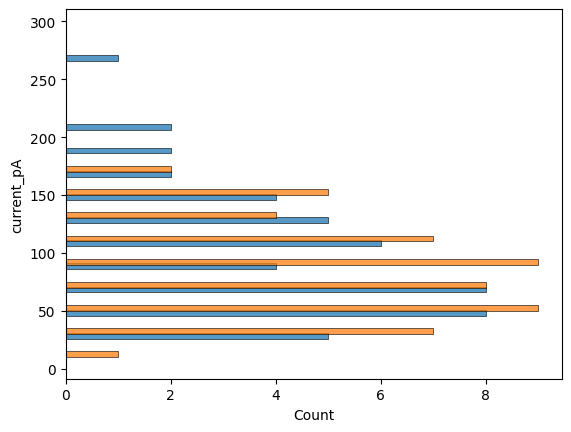

In [ ]:
sns.histplot(y='current_pA', data=Control, bins=range(6,300,5))
sns.histplot(y='current_pA', data=DHB, bins=range(10,300,5))

## First Spike

In [ ]:
table2

,cell,current_pA,group,idade,regiao,peak_voltage,AP_amplitude,AP_duration,AP_begin_time,AP_begin_width,...,AP_height,AP_rise_time,ADP_peak_amplitude,ADP_peak_values,AHP_depth,AHP_depth_abs,AHP_depth_abs_slow,AHP_depth_from_peak,AHP_depth_slow,AHP_time_from_peak
0,Cell 1,30.0,ANOXIA,P14-P17,HPC,52.886963,97.229004,2.7,150.5,2.9,...,52.886963,0.6,0.061035,-41.259766,19.000583,-41.320801,-53.710937,94.207764,6.610447,2.3
1,Cell 2,110.0,ANOXIA,P14-P17,HPC,34.820557,72.723389,1.5,167.6,1.2,...,34.820557,0.4,1.281738,-50.598145,8.836534,-51.879883,-54.229736,86.700439,6.486681,1.3
2,Cell 3,10.0,ANOXIA,P14-P17,HPC,48.065186,87.432861,3.7,85.2,4.6,...,48.065186,0.9,0.610352,-37.841797,9.845310,-38.452148,-51.971436,86.517334,-3.673977,3.7
3,Cell 4,90.0,ANOXIA,P14-P17,HPC,46.661377,93.170166,2.5,165.4,3.0,...,46.661377,0.7,1.098633,-42.755127,27.879503,-43.853760,-53.894043,90.515137,17.839220,2.3
4,Cell 5,130.0,ANOXIA,P14-P17,HPC,52.764893,92.254639,2.6,237.2,3.6,...,52.764893,0.6,0.610352,-37.475586,33.337063,-38.085937,-50.659180,90.850830,20.763821,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Cell 44,170.0,CONTROLE,P14-P17,HPC,56.213379,100.036621,2.1,131.2,3.0,...,56.213379,0.5,1.678467,-41.015625,24.125841,-42.694092,-52.062988,98.907471,14.756944,2.5
97,Cell 45,90.0,CONTROLE,P14-P17,HPC,57.556152,101.837158,2.3,82.1,2.8,...,57.556152,0.5,1.159668,-41.076660,19.658407,-42.236328,-50.476074,99.792480,11.418660,2.3
98,Cell 46,110.0,CONTROLE,P14-P17,HPC,53.527832,92.712402,2.3,228.7,3.0,...,53.527832,0.5,0.488281,-37.048340,27.496338,-37.536621,-52.520752,91.064453,12.512207,2.5
99,Cell 47,70.0,CONTROLE,P14-P17,HPC,52.490234,95.642090,2.4,109.3,3.0,...,52.490234,0.5,0.915527,-41.412354,20.565457,-42.327881,-50.231934,94.818115,12.661404,2.5


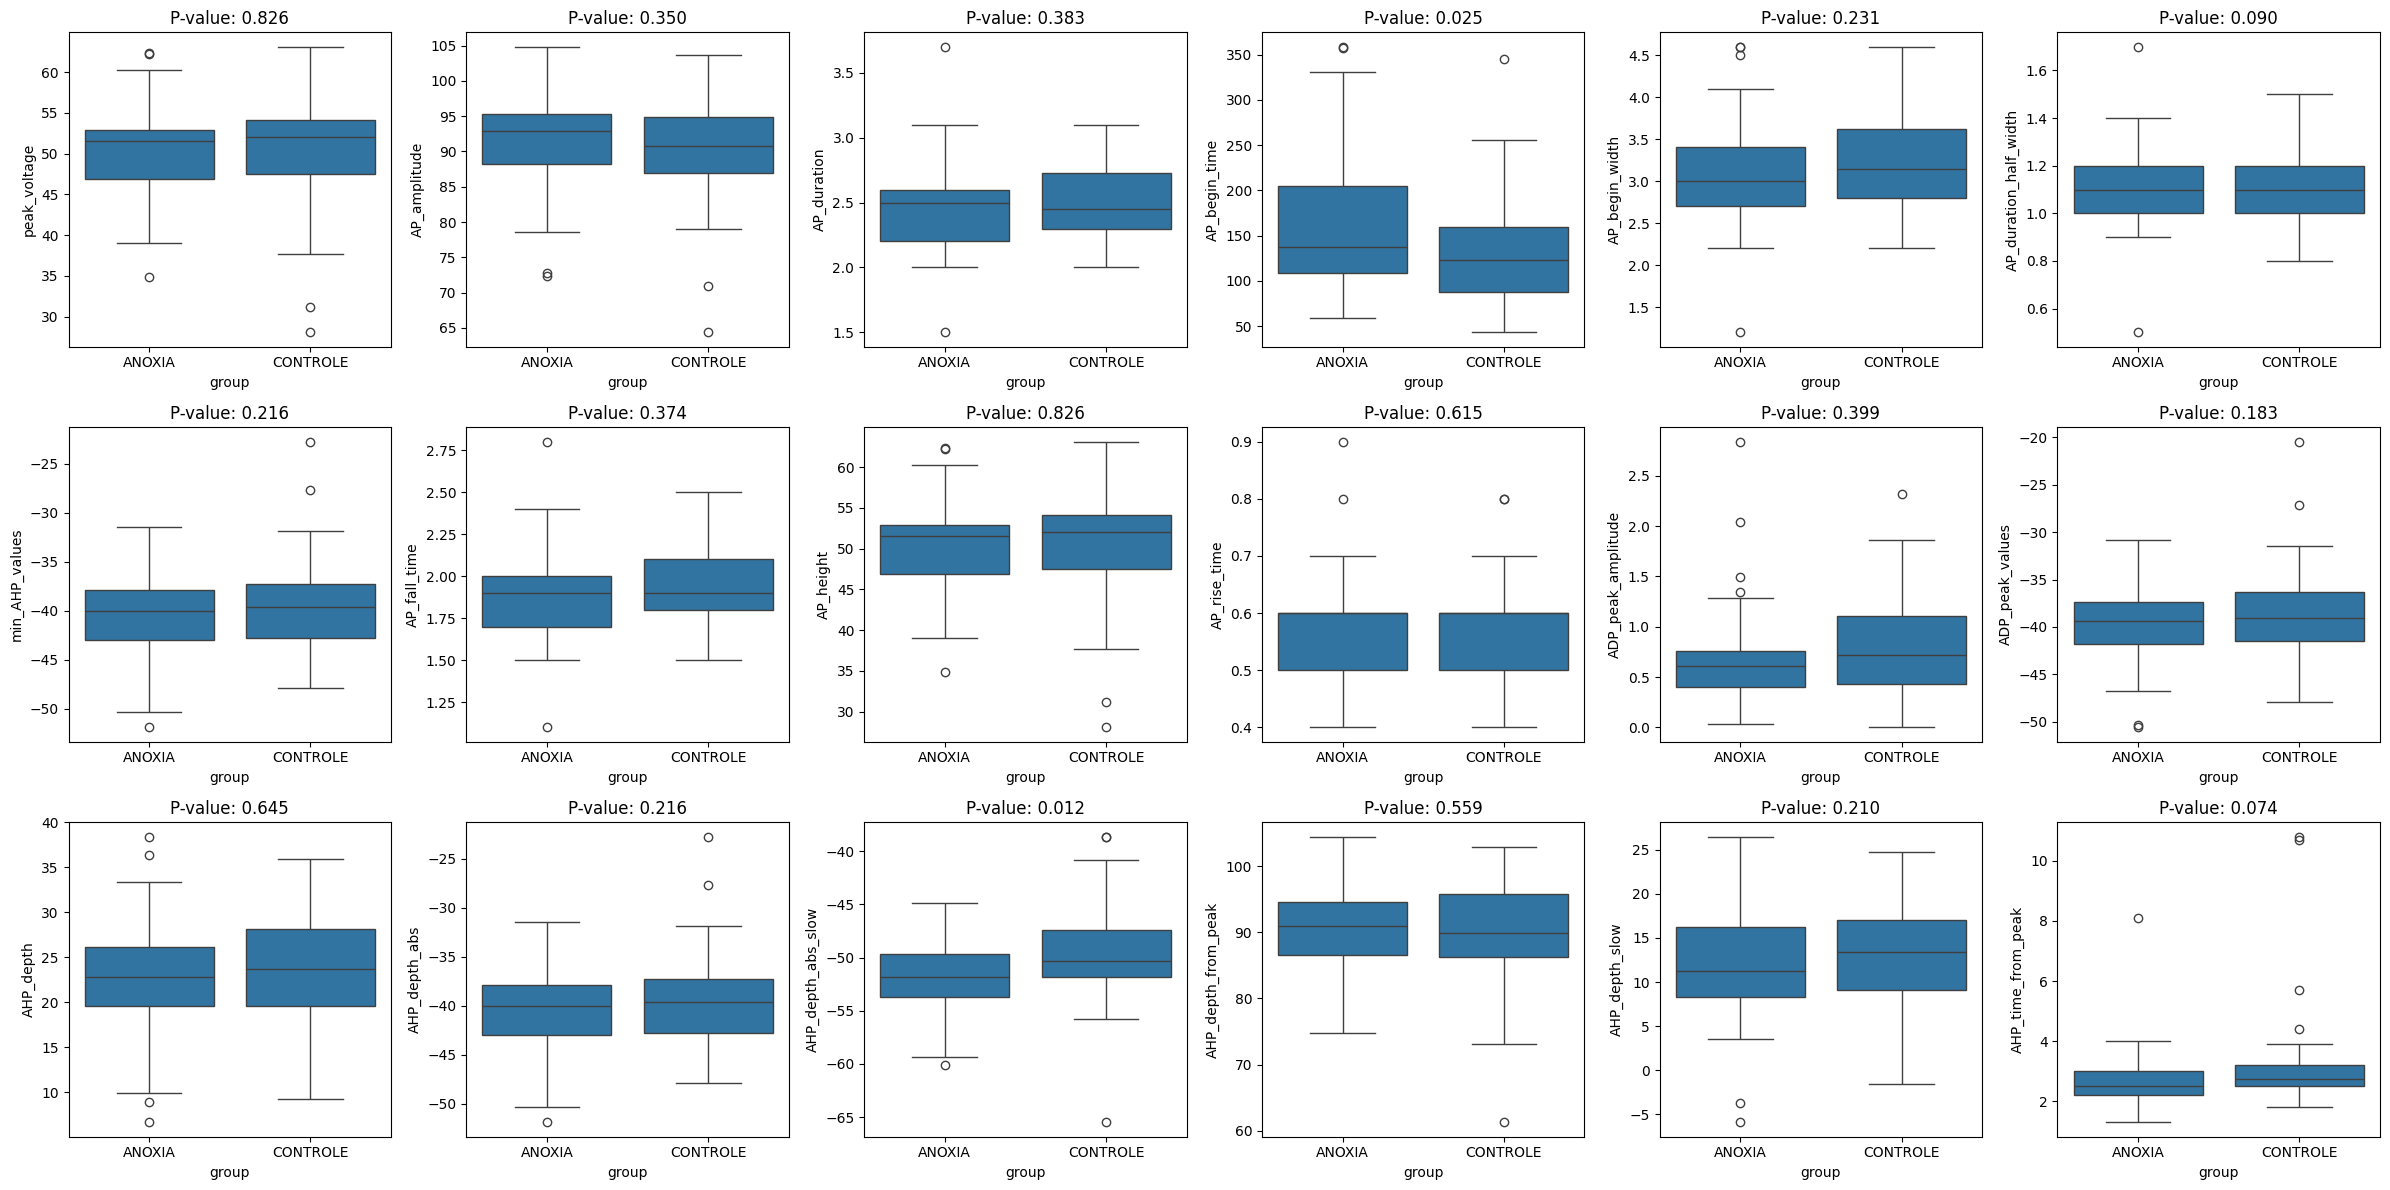

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))

data_filtered = table2[table['group'].isin(['CONTROLE', 'ANOXIA'])]

for i, medida in enumerate(medidas):


    # Perform t-test
    control_data = data_filtered[data_filtered['group'] == 'CONTROLE'][medida].astype(float) # Convert to numeric type
    anoxia_data = data_filtered[data_filtered['group'] == 'ANOXIA'][medida].astype(float) # Convert to numeric type
    t_stat, p_value = stats.ttest_ind(control_data, anoxia_data)

    # print(f"T-statistic: {t_stat:.2f}")
    # print(f"P-value: {p_value:.3f}")

    # plt.title(f"Mean {medida}, P-value: {p_value:.3f}")
    # Create boxplot
    row = i // 6  # Calculate the row index
    col = i % 6   # Calculate the column index
    ax = axes[row, col]  # Access the correct Axes object using row and column indices
    ax.set_title(f"P-value: {p_value:.3f}")
    sns.boxplot(x='group', y=medida, data=data_filtered, ax = ax)

plt.tight_layout()
plt.show()

In [ ]:
Control = table.get(table2["group"] == "CONTROLE")
DHB = table.get(table2["group"] == "ANOXIA")
Control

,cell,current_pA,group,idade,regiao,peak_voltage,AP_amplitude,AP_duration,AP_begin_time,AP_begin_width,...,AP_height,AP_rise_time,ADP_peak_amplitude,ADP_peak_values,AHP_depth,AHP_depth_abs,AHP_depth_abs_slow,AHP_depth_from_peak,AHP_depth_slow,AHP_time_from_peak
53,Cell 1,70.0,CONTROLE,P14-P17,HPC,52.754720,93.841553,2.633333,475.800000,3.200000,...,52.754720,0.600000,1.464844,-32.735189,30.358209,-34.200033,-53.466797,86.954753,11.091444,2.600000
54,Cell 2,90.0,CONTROLE,P14-P17,HPC,46.844482,86.680094,2.966667,259.933333,3.866667,...,46.844482,0.666667,1.322428,-34.423828,30.107286,-35.746257,-52.388509,82.590739,13.465034,3.200000
55,Cell 3,30.0,CONTROLE,P14-P17,HPC,45.735677,85.530599,2.766667,159.733333,3.533333,...,45.735677,0.633333,0.895182,-35.247803,14.882406,-36.142985,-50.384521,81.878662,0.640869,2.900000
56,Cell 4,150.0,CONTROLE,P14-P17,HPC,30.324300,80.607096,2.900000,118.900000,3.166667,...,30.324300,0.866667,0.986735,-39.988200,37.233141,-40.974935,-63.791911,71.299235,14.416165,2.300000
57,Cell 5,110.0,CONTROLE,P14-P17,HPC,58.186849,76.904297,3.400000,446.766667,4.200000,...,58.186849,0.866667,1.495361,-18.829346,33.082750,-20.324707,-38.635254,78.511556,14.772203,3.400000
58,Cell 6,50.0,CONTROLE,P14-P17,HPC,56.620280,95.906576,2.466667,433.500000,2.833333,...,56.620280,0.500000,1.597087,-34.261068,23.652818,-35.858154,-50.415039,92.478434,9.095934,2.333333
59,Cell 7,90.0,CONTROLE,P14-P17,HPC,60.333252,101.430257,2.466667,244.900000,2.566667,...,60.333252,0.500000,0.986735,-38.543701,23.152669,-39.530436,-50.181071,99.863688,12.502035,2.066667
60,Cell 8,50.0,CONTROLE,P14-P17,HPC,43.894450,83.730062,2.800000,227.166667,3.266667,...,43.894450,0.700000,0.773112,-42.785645,10.447184,-43.558757,-56.040446,87.453206,-2.034505,2.966667
61,Cell 9,30.0,CONTROLE,P14-P17,HPC,52.327474,98.968506,2.733333,357.300000,3.433333,...,52.327474,0.533333,1.057943,-46.264648,15.333388,-47.322591,-56.304932,99.650065,6.351047,3.066667
62,Cell 10,70.0,CONTROLE,P14-P17,HPC,48.960368,87.921143,2.433333,379.800000,3.700000,...,48.960368,0.533333,0.620524,-38.859049,20.851983,-39.479574,-51.498413,88.439941,8.833143,3.433333


In [ ]:
ls 'Analises_Fernando'

 ANALISES_FERNANDO_ATIVAS_p15_3spikes.ipynb   Anx_p25_passivas_-70pA.csv
 ANALISES_FERNANDO_ATIVAS_p25_3spikes.ipynb   Anx_p25_passivas_-90pA.csv
 ANALISES_FERNANDO_ATIVAS_p25_Freq_I.ipynb    Anx_p25_passivas.csv
 ANALISES_FERNANDO_PASSIVAS_p15.ipynb        'Copy of ANALISES_FERNANDO_PASSIVAS_p25.ipynb'
 ANALISES_FERNANDO_PASSIVAS_PFC.ipynb         Ctl_p15_ativas_1spike.csv
 ANALISES_PASSIVAS_LUCAS.ipynb                Ctl_p15_ativas_3spikes.csv
 Anx_p15_ativas_1spike.csv                    Ctl_p15_passivas_-70pA.csv
 Anx_p15_ativas_3spikes.csv                   Ctl_p15_passivas_-90pA.csv
 Anx_p15_passivas_-70pA.csv                   Ctl_p15_passivas.csv
 Anx_p15_passivas_-90pA.csv                   Ctl_p25_ativas_1spike.csv
 Anx_p15_passivas_-90pA.gsheet                Ctl_p25_ativas_3spikes.csv
 Anx_p15_passivas.csv                         Ctl_p25_passivas_-70pA.csv
 Anx_p15_passivas.gsheet                      Ctl_p25_passivas_-90pA.csv
 Anx_p25_ativas_1spike.csv                    

In [ ]:
DHB.to_csv('Analises_Fernando/Anx_p15_ativas_1spike.csv')
Control.to_csv('Analises_Fernando/Ctl_p15_ativas_1spike.csv')

<Axes: xlabel='Count', ylabel='current_pA'>

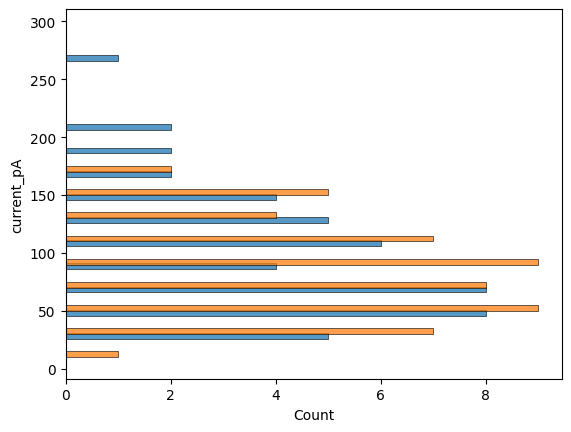

In [ ]:
sns.histplot(y='current_pA', data=Control, bins=range(6,300,5))
sns.histplot(y='current_pA', data=DHB, bins=range(10,300,5))